In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["figure.figsize"] = (9,6)

### Rewind = 2000

In [5]:
percentage_weights = []
for levl in range(0, 27):
    file_path = '../open_lth_data/lottery_c1a4481294f1a9a9c8f49d5c011823aa/replicate_1/level_'+str(levl)+'/main/sparsity_report.json'
    with open(file_path) as fp:
        data = json.load(fp)
    percentage_weights.append(round(100 * data['unpruned'] / data['total'], 2))

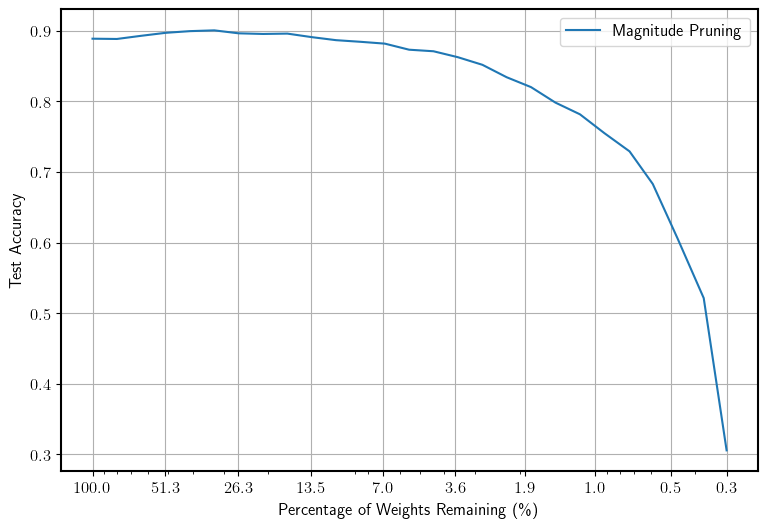

In [6]:
# Magnitude Pruning
mag_accuracies = np.array([])
x_labels = [100, 51.3, 26.3, 13.5, 7.0, 3.6, 1.9, 1.0, 0.5, 0.3]

for levl in range(0, 27):
    my_data = pd.read_csv('../open_lth_data/lottery_c1a4481294f1a9a9c8f49d5c011823aa/replicate_1/level_'+str(levl)+'/main/logger', header=None)
    my_data.columns = ['a', 'b', 'c']
    test_accuracies = my_data[my_data.a=='test_accuracy']
    col = "c"
    val= test_accuracies.loc[test_accuracies[col].idxmax()].c
    mag_accuracies = np.append(mag_accuracies,val)

fig, ax = plt.subplots()
ax.plot(percentage_weights, mag_accuracies, label='Magnitude Pruning')
ax.invert_xaxis()
ax.set_xscale("log")
ax.set_xticks(x_labels)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Percentage of Weights Remaining (\%)")
ax.set_ylabel("Test Accuracy")
ax.grid()
ax.legend()
plt.show()

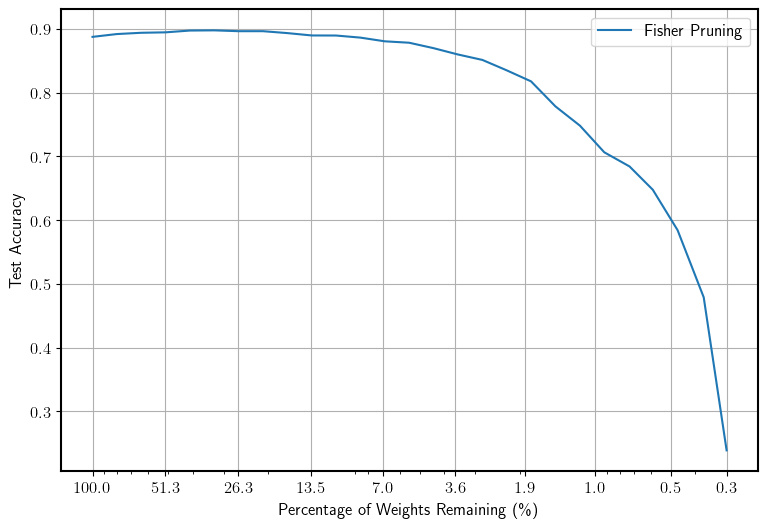

In [7]:
# Fisher Pruning
fisher_accuracies = np.array([])
x = np.arange(0,27,1)
x_labels = [100, 51.3, 26.3, 13.5, 7.0, 3.6, 1.9, 1.0, 0.5, 0.3]

for levl in range(0, 27):
    my_data = pd.read_csv('../open_lth_data/lottery_6e61e48b5002abc2968f81026bf565dc/replicate_1/level_'+str(levl)+'/main/logger', header=None)
    my_data.columns = ['a', 'b', 'c']
    test_accuracies = my_data[my_data.a=='test_accuracy']
    col = "c"
    val= test_accuracies.loc[test_accuracies[col].idxmax()].c
    fisher_accuracies = np.append(fisher_accuracies,val)

fig, ax = plt.subplots()
ax.plot(percentage_weights, fisher_accuracies, label='Fisher Pruning')
ax.invert_xaxis()
ax.set_xscale("log")
ax.set_xticks(x_labels)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Percentage of Weights Remaining (\%)")
ax.set_ylabel("Test Accuracy")
ax.grid()
ax.legend()
plt.show()

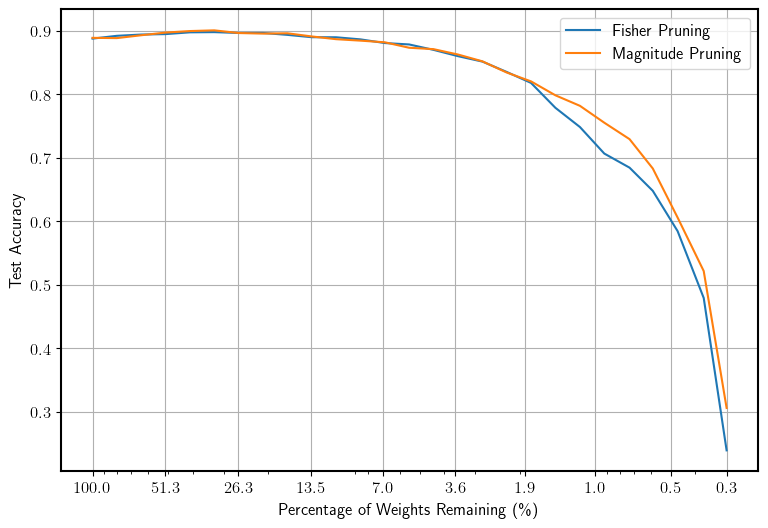

In [8]:
# Both
fig, ax = plt.subplots()
ax.plot(percentage_weights, fisher_accuracies, label='Fisher Pruning')
ax.plot(percentage_weights, mag_accuracies, label='Magnitude Pruning')
ax.invert_xaxis()
ax.set_xscale("log")
ax.set_xticks(x_labels)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Percentage of Weights Remaining (\%)")
ax.set_ylabel("Test Accuracy")
ax.grid()
ax.legend()
plt.show()